# An Overview of my Training in 2021

In [116]:
'''
A program which analyses my 2021 training using pandas

This first chunk reads in the training data
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from IPython.display import display, HTML

pd.set_option("display.max_rows", None, "display.max_columns", None)

data = pd.read_csv("2021_AP.csv") #reads in data

data['date'] = pd.to_datetime(data['date']) #changes to correct date format
data['weekNum'] = data['date'].dt.isocalendar().week #adds a week number column

#changes time to hours
data['time'] = pd.to_timedelta(data['time'])
data['time'] = data['time'] / np.timedelta64(1, 'h')

print("The data points I have to work with:")
print(data.columns.tolist()) #displays the names of the columns

The data points I have to work with:
['date', 'hour', 'activity', 'workout', 'keywords', 'time', 'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'distance(km)', 'climb(m)', 'intensity', 't-intensity', 'ahr', 'mhr', 'controls', 'spiked', 'rhr', 'sleep', 'weight(kg)', 'injured', 'sick', 'restday', 'shoes', 'route', 'description', 'private note', 'weekNum']


In [113]:
'''
This just provides some basic statistics from the data
'''

print("Total time spent training: " + str(sum(data['time'].fillna(0))) + " Hrs") #total hours
print("Total distance run and orienteered: " + str(sum(data['distance(km)'].fillna(0))) + " Kms") #total distance
print("-----------------------------------")

df1 = data[['date', 'time']] #extracts wanted columns
df1 = df1.groupby(['date'])['time'].sum().reset_index() #groups by date and sums up time

avgday = sum(df1['time']) / 365 #calculates average daily training time

hours = int(avgday) #gets the hours
minutes = (avgday*60) % 60 #gets the minutes
seconds = (avgday*3600) % 60 #gets the seconds

print("Average daily training time: %d:%02d:%02d" % (hours, minutes, seconds)) #displays
print("-----------------------------------")


df2 = data[['date', 'activity']] #needed columns
df2 = df2[df2.activity != 'Note'] #removes Note activity type
df2 = df2.groupby(['date']).size().reset_index(name='counts') #counts number of daily activities

print("Number of days active: " + str(len(df2['counts'])))
print("Mean number of daily activities: " + str(sum(df2['counts']) / 365))
print("Modal daily activities: " + str(statistics.mode(df2['counts'])))
print("Median daily activities: " + str(statistics.median(df2['counts'])))
print("-----------------------------------")


df4 = data[['date', 'activity']]
df4 = df4[df4.activity != 'Note']
df4 = df4.groupby(['activity']).size().reset_index(name='Number of Sessions logged') #counts number of times an activity was done

print("Data about the number of sessions completed")
print("")
print(df4)
print("-----------------------------------")

Total time spent training: 588.262777777777 Hrs
Total distance run and orienteered: 4499.890000000003 Kms
-----------------------------------
Average daily training time: 1:36:42
-----------------------------------
Number of days active: 354
Mean number of daily activities: 2.4794520547945207
Modal daily activities: 1
Median daily activities: 2.0
-----------------------------------
Data about the number of sessions completed

       activity  Number of Sessions logged
0  Orienteering                        105
1       Running                        578
2         S & C                        131
3            XT                         91
-----------------------------------


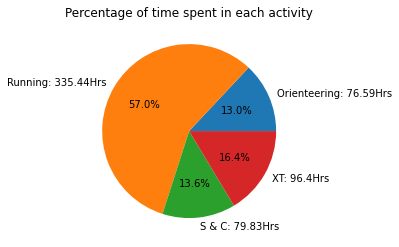

In [5]:
'''
Displays percentage of timespent in each activity type
'''

df = data[['weekNum', 'activity', 'time']] #extracts wanted columns
df = df[df.activity != 'Note'] #removes Note activity type
df = df.groupby(['activity'])['time'].sum().reset_index() #groups by activity and sums up time

l = [] #a new list for the labels
for (a, t) in zip(df['activity'].tolist(), df['time'].tolist()): #goes through each activity, time pair
    l.append(a + ": " + str(round(t, 2)) + "Hrs") #concats them together

df.plot(kind='pie', y='time', autopct='%1.1f%%', labels=l, legend=False, ylabel='') #plots a pie chart with the information
plt.title("Percentage of time spent in each activity")
plt.show()

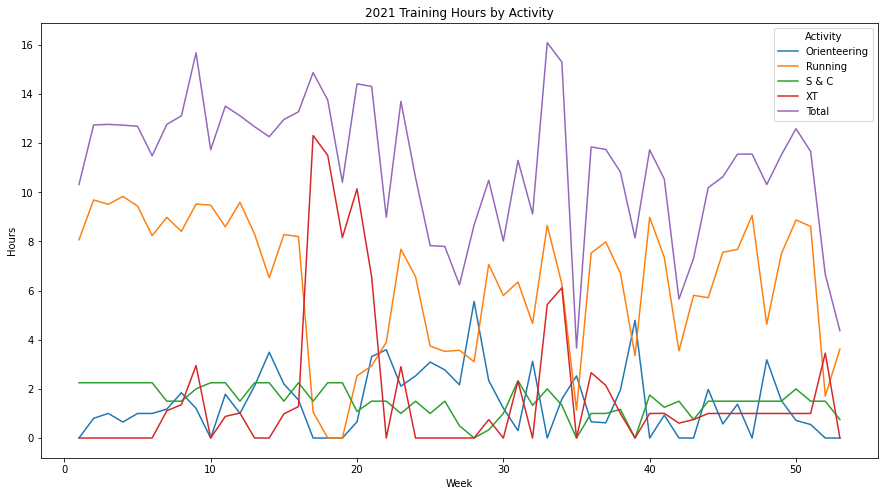

In [131]:
h_data = data[["activity","time","weekNum"]] #extract data needed
h_data = h_data[h_data.activity != "Note"] #removes Note actiovity type
h_data = h_data.groupby(['weekNum', 'activity'])['time'].sum().reset_index() #groups by week and activity type
h_data = h_data.pivot(index='weekNum', columns='activity', values='time').fillna(0) #pivots so I can plot
h_data['Total'] = h_data['Orienteering'] + h_data['Running'] + h_data['S & C'] + h_data['XT'] #adds a total column

#plots the data
h_data.plot(figsize=(15,8))
plt.xlabel("Week")
plt.ylabel("Hours")
plt.title("2021 Training Hours by Activity")
plt.legend(title="Activity")
plt.show()


In [90]:
print("2021 average weekly training hours: " + str(round(h_data['Total'].mean(), 3))) #finds weekly mean hours

#finds weekly mean distance
df5 = data[['weekNum', 'distance(km)']].fillna(0)
df5 = df5.groupby('weekNum').sum()
print("2021 average weekly distance: " + str(round(df5['distance(km)'].mean())))


2021 average weekly training hours: 11.099
2021 average weekly distance: 85


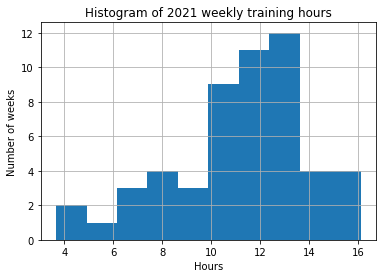

In [78]:
h_data.hist(column='Total')
plt.xlabel("Hours")
plt.ylabel("Number of weeks")
plt.title("Histogram of 2021 weekly training hours")
plt.show()

# Injury #1


**Description:** a bruised foot bone from standing on a rock. <br>
**Injury date:** 24th April <br>
**Injury time:** 22days <br>
**Suspected reason:** No easy weeks, body was completely drained and tired so my bones were a bit weak so when I stood awkwardly on a rock it got damaged very easily.


<AxesSubplot:xlabel='weekNum'>

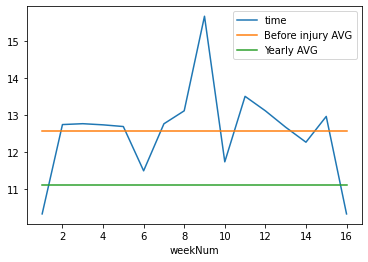

In [110]:
'''
Here I look at the section of my training data which occured before my first injury
'''

injury_date = "2021-04-24"
before_injury = data[(data.date < injury_date) & (data.activity != 'Note') & (data.weekNum != 53)][['weekNum', 'activity', 'time']]
before_injury = before_injury.groupby('weekNum').sum()
before_injury['Before injury AVG'] = before_injury['time'].mean()
before_injury['Yearly AVG'] = h_data['Total'].mean()
before_injury.plot()


In the $16$ weeks(!!) before my first big injury my average weekly training volume was ~1hr greater than that of the yearly average. However more shockingly is that I didn't have ANY weeks below the yearly average in this time. I think this was the bigger problem as I was giving my body no time to recover.

**Lesson:** I can train at big volumes BUT I need to take one week every month nice and easy to let the body rest and recover.

# Injury #2


**Description:** Plantar Fasciitis <br>
**Injury date:** 25th June <br>
**Injury time:** Could run 3 days later, but sore for ~3months <br>
**Suspected reason:** I built my running volume back up very quickly after the previous injury in an attempt to get fit for the World Orienteering Champs. And then I ran lots of hills in the 3 days before it really flared up.


In [130]:
'''
We now look at the training in the weeks leading up to this injury
'''

injury_date = "2021-06-25"
df6 = data[(data.date < injury_date) & (data.date > "2021-05-18")][['weekNum', 'activity', 'time']]
df6 = df6[(df6.activity == 'Running') | (df6.activity == 'Orienteering')]
df6 = df6.groupby(['weekNum']).sum()
df6['Percentage increase'] = df6.pct_change()

print(df6)

             time  Percentage increase
weekNum                               
20       2.731667                  NaN
21       6.252500             1.288896
22       7.488889             0.197743
23       9.796667             0.308160
24       9.098056            -0.071311
25       5.810556            -0.361341


We can see that in the week leading up to the injury I increased my running volume by $129$% then $20$% then $31$% before tapering off. I think this taper off was me realising that my foot was sore and I was so trying to train  through it, before it really flared up and I had to stop.

**Lesson:** Don't increase my running volume by more than $20$% a weekl and if I am increasing week on week keep the increase to less than $15$%.

# Injury #3


**Description:** Ankle sprain <br>
**Injury date:** 1st August <br>
**Injury time:** Could run 3 days later, but it's an ongoing problem <br>
**Suspected reason:** I had spent a lot of time orienteering in rough Finnish terrain in the previous weeks, more than normal so the ankles weren't ready for it and it was just a matter of time before I sprained it.


In [ ]:
'''
I want to compare the total orienteering time here to what I did on average
'''